In [2]:
%matplotlib inline
import bt

Bt is a simple Python package that can be used to fetch financial data, analyze them, establish algorithmic trading strategies, and backtesting them. It is a great tool to test anything you learn in financial courses. A complete description of the package can be found [here](http://pmorissette.github.io/bt/). It is an open-source package : which means you can access the code behind it on its [github repository](https://github.com/pmorissette/bt). Most of the Python packages work this way : so please get used to using other people work and to reading package documentations, because that is the way Python works.

Let's start by choosing which stock we want to invest in. We will focus on US equity. We can use any ticker symbol of any US Equity. A list can be found [here](http://eoddata.com/symbols.aspx). Let's choose three companies.

We can use the bt method bt.get() to fetch financial data from Yahoo. To know how a method work, we can always use the python method help().

In [ ]:
help(bt.get)

This is a bit "raw", but it can be useful. Another solution is to check the [package documentation](http://pmorissette.github.io/bt/index.html). Here is how to use bt.get():

In [27]:
equity_list = ['AAPL', 'MCD', 'MSFT', 'IEF']
data = bt.get(equity_list, start='2010-01-01')
print data.head()

                 aapl        mcd       msft        ief
Date                                                  
2009-12-31  26.986492  48.665546  24.766968  74.886589
2010-01-04  27.406532  48.930527  25.148876  75.072548
2010-01-05  27.453915  48.556431  25.157001  75.402184
2010-01-06  27.017223  47.893948  25.002611  75.097900
2010-01-07  26.967278  48.244671  24.742592  75.097900


We can check the type of this new Python object by using the method type()

In [28]:
type(data)

pandas.core.frame.DataFrame

It is a dataframe of the package Pandas, the most used Python package to do data analysis.
We can check the features of a pandas dataframe by using th method dir().

In [29]:
dir(data)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod_

There is a lot of things, and methods are mixed up with attributes. It is easier to check the Pandas documentation about [dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html):


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effd9b34e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7effd9a53650>]], dtype=object)

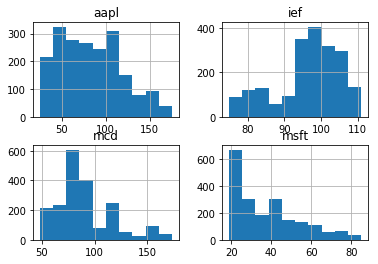

In [30]:
data.hist()

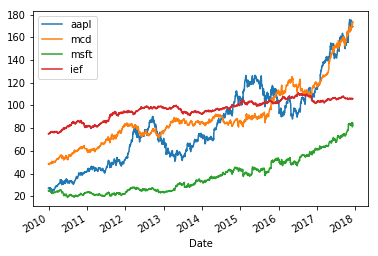

In [31]:
data.plot()

An interesting argument for the drawing methods such as plot() or hist() is the size you want. Just specify figsize = (length, height).

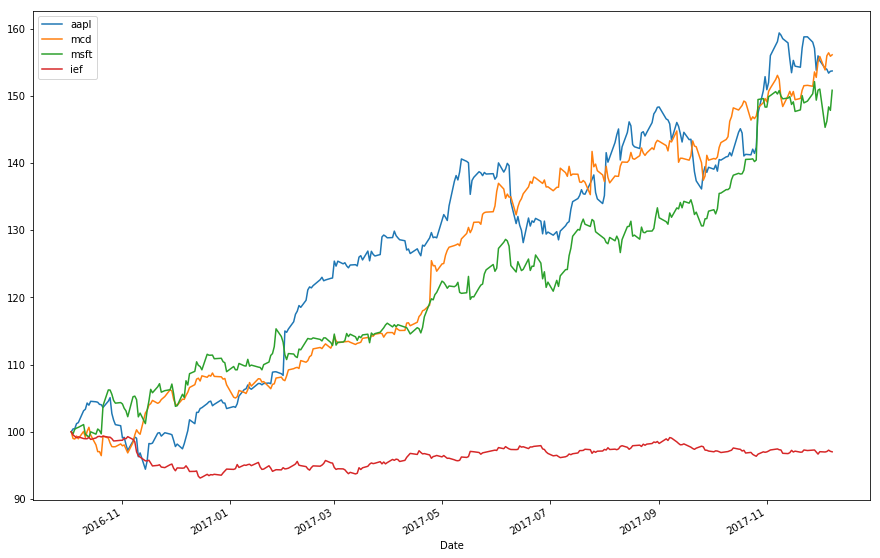

In [49]:
data.tail(300).rebase().plot(figsize = (15, 10))

In [62]:
data.describe() # Exo a trouver par les élèves

,aapl,mcd,msft,ief
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,82.879961,90.520148,37.927659,96.415693
std,36.073521,26.963839,16.314485,8.793845
min,24.594294,47.893948,18.869308,74.886589
25%,51.942879,74.314942,23.912449,92.979379
50%,77.619613,85.099152,33.278549,97.738335
75%,108.674675,108.484211,48.935951,103.245257
max,175.608719,173.479996,84.879997,110.984940


Exercise : find a way to 
- display only the most recent prices (the last items of the dataframe). 
- plot them....
- Ideally, I would like to plot the evolution of these equities during their last 30 quotes.

Solution (3 commands)

Some useful bt methods are rebase() and to_returns().

In [34]:
print data.head().rebase()

                  aapl         mcd        msft         ief
Date                                                      
2009-12-31  100.000000  100.000000  100.000000  100.000000
2010-01-04  101.556482  100.544494  101.542005  100.248321
2010-01-05  101.732063   99.775786  101.574811  100.688501
2010-01-06  100.113875   98.414488  100.951441  100.282175
2010-01-07   99.928801   99.135168   99.901579  100.282175


In [35]:
print data.head().to_returns()

                aapl       mcd      msft       ief
Date                                              
2009-12-31       NaN       NaN       NaN       NaN
2010-01-04  0.015565  0.005445  0.015420  0.002483
2010-01-05  0.001729 -0.007645  0.000323  0.004391
2010-01-06 -0.015906 -0.013644 -0.006137 -0.004035
2010-01-07 -0.001849  0.007323 -0.010400  0.000000


Exercise : produce the two following plots :
- The price evolution during the last 30 quotes rebased to 100 at the beginning of the plot.
- The histogram of the returns of the three equities during the last 30 quotes

Solution

Let's see how to display some financial statistics about our data.

In [36]:
stats = data.calc_stats()
stats.display()

Stat                 aapl        mcd         msft        ief
-------------------  ----------  ----------  ----------  ----------
Start                2009-12-31  2009-12-31  2009-12-31  2009-12-31
End                  2017-12-08  2017-12-08  2017-12-08  2017-12-08
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         527.61%     255.80%     239.81%     41.43%
Daily Sharpe         1.04        1.14        0.80        0.73
Daily Sortino        1.48        1.67        1.16        1.13
CAGR                 26.04%      17.34%      16.66%      4.46%
Max Drawdown         -43.80%     -15.50%     -26.37%     -9.08%
Calmar Ratio         0.59        1.12        0.63        0.49

MTD                  -1.44%      0.69%       -0.01%      0.35%
3m                   7.15%       9.06%       14.33%      -2.07%
6m                   10.10%      15.71%      18.18%      -0.45%
YTD                  48.59%      45.92%      38.46%      2.72%
1Y                   53.49%      47.46%

What does it mean ?

- Total Return: Total return on the period.
- Daily Sharpe: Daily Sharpe ratio

The Sharpe ratio : $$S(x) = \frac{R_x - r}{\sigma_x}$$
With $R_x$ being the investment return, $r$ being the riskfree rate and $\sigma_x$ being the standard deviation of the investment.
The Sharpe ratio measures the return you are receiving in comparison with the risk you are taking.
- Daily Sortino: Daily SOrtino ratio

The Sortino ratio (as used in the bt package) is a variation of the Sharpe ratio, taking into account only the negative volatility. The formula is very similar :
$$S^{'}(x) = \frac{R_x - r}{\sigma^-_x}$$
With $R_x$ being the investment return, $r$ being the riskfree rate and $\sigma^-_x$ being the downside deviation of the investment.

- CAGR: Compound annual growth rate

The compound annual growth rate (CAGR) :
$${CAGR}(t_0,t_n) = \left( {V(t_n)/V(t_0)} \right)^\frac{1}{t_n-t_0} - 1$$
It is an easy way to have an idea of the "average" return during the period : taking the actual average of the annual returns is not as good, given that volatility can affect the results.

- Max Drawdown: Maximum decline of the equity
- Calmar Ratio: Ratio of the CAGR and the absolute value of the Max Drawdown

 
 
- Daily Mean (ann.): Daily average of return, times the number of trading periods in a year (252)
- Daily Vol (ann.): Same thing with the standard deviation
- Daily Skew: Usual measure of the asymmetry, daily average
- Daily Kurt: Usual measure of "tailedness", daily average
 
  
  
- MTD: The month to date return
- 3m: 3 months ago to date return
- 6m: 6 months
- YTD: The beginning of the year to date return
- 1Y: One year ago to date return
- 3Y: Etc.
- 5Y: Etc.
- 10Y: Be careful : these stats are limited by the data start date !
- Since Incep. (ann.): Same thing !

To get correct statistics (such as Sharpe and Sortino ratios), we have to specify the riskfree rate on the considered period. The Treasury Bonds rate is used. We will use the ticker symbol [IEF](http://eoddata.com/stockquote/NASDAQ/IEF.htm) to determine the riskfree rate.

In [60]:
riskfree =  bt.get('IEF', start='2010-01-01')
riskfree_rate = float(riskfree.calc_cagr())
print riskfree_rate

0.0446382015855
Stat                 aapl        mcd         msft        ief
-------------------  ----------  ----------  ----------  ----------
Start                2009-12-31  2009-12-31  2009-12-31  2009-12-31
End                  2017-12-08  2017-12-08  2017-12-08  2017-12-08
Risk-free rate       4.46%       4.46%       4.46%       4.46%

Total Return         527.61%     255.80%     239.81%     41.43%
Daily Sharpe         0.87        0.85        0.61        0.03
Daily Sortino        1.24        1.24        0.88        0.05
CAGR                 26.04%      17.34%      16.66%      4.46%
Max Drawdown         -43.80%     -15.50%     -26.37%     -9.08%
Calmar Ratio         0.59        1.12        0.63        0.49

MTD                  -1.44%      0.69%       -0.01%      0.35%
3m                   7.15%       9.06%       14.33%      -2.07%
6m                   10.10%      15.71%      18.18%      -0.45%
YTD                  48.59%      45.92%      38.46%      2.72%
1Y                   53

We can now display accurate statistics about our data.

In [61]:
stats.set_riskfree_rate(riskfree_rate)
stats.display()

Stat                 aapl        mcd         msft        ief
-------------------  ----------  ----------  ----------  ----------
Start                2009-12-31  2009-12-31  2009-12-31  2009-12-31
End                  2017-12-08  2017-12-08  2017-12-08  2017-12-08
Risk-free rate       4.46%       4.46%       4.46%       4.46%

Total Return         527.61%     255.80%     239.81%     41.43%
Daily Sharpe         0.87        0.85        0.61        0.03
Daily Sortino        1.24        1.24        0.88        0.05
CAGR                 26.04%      17.34%      16.66%      4.46%
Max Drawdown         -43.80%     -15.50%     -26.37%     -9.08%
Calmar Ratio         0.59        1.12        0.63        0.49

MTD                  -1.44%      0.69%       -0.01%      0.35%
3m                   7.15%       9.06%       14.33%      -2.07%
6m                   10.10%      15.71%      18.18%      -0.45%
YTD                  48.59%      45.92%      38.46%      2.72%
1Y                   53.49%      47.46%

## Strategies

You can establish strategies in bt in order to choose a portfolio of equities and to automatically ajust this portfolio given a determined strategy. To do so, we will use the bt.Strategy() object.

In [63]:
help(bt.Strategy)

Help on class Strategy in module bt.core:

class Strategy(StrategyBase)
 |  Strategy expands on the StrategyBase and incorporates Algos.
 |  
 |  Basically, a Strategy is built by passing in a set of algos. These algos
 |  will be placed in an Algo stack and the run function will call the stack.
 |  
 |  Furthermore, two class attributes are created to pass data between algos.
 |  perm for permanent data, temp for temporary data.
 |  
 |  Args:
 |      * name (str): Strategy name
 |      * algos (list): List of Algos to be passed into an AlgoStack
 |      * children (dict, list): Children - useful when you want to create
 |          strategies of strategies
 |  
 |  Attributes:
 |      * stack (AlgoStack): The stack
 |      * temp (dict): A dict containing temporary data - cleared on each call
 |          to run. This can be used to pass info to other algos.
 |      * perm (dict): Permanent data used to pass info from one algo to
 |          another. Not cleared on each pass.
 |  
 |  

As we can see, a strategy is a stack of algorithms that work one after the other, transmitting data to each other and / or stop signals. A more complete explanation can be found in the [official documentation](http://pmorissette.github.io/bt/algos.html).

A good structure for a stack of algorithm is the following one :
- frequency : which frequency should your strategy use ?
- selection: which securities should you choose ?
- weighting: how much weight should each of the selected securities have in the target portfolio?
- allocate: close out positions that are no longer needed and allocate capital to those that were selected and given target weights.

Let's take a practical example, making these choices :
- frequency : every month
- selection: all the securities available (in the dataframe)
- weighting: equal weight to all
- allocate.


In [67]:
s1 = bt.Strategy('Equal weights', 
                       [bt.algos.RunMonthly(),
                       bt.algos.SelectHasData(),
                       bt.algos.WeighMeanVar(),
                       bt.algos.Rebalance()])

We then run a backtest to assess the efficiency of our automated trading strategy.

Equal weights
0% [############################# ] 100% | ETA: 00:00:00

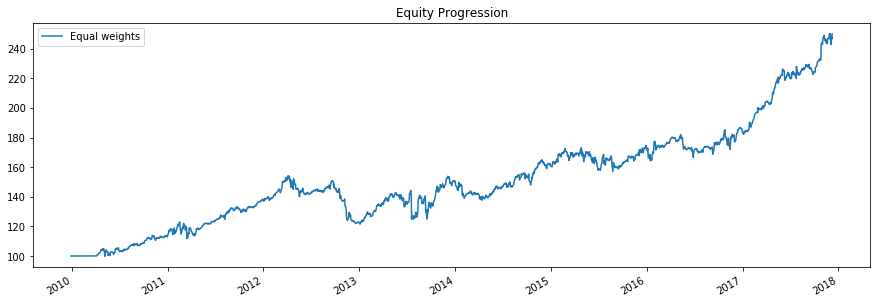

In [68]:
test = bt.Backtest(s1, data)
res = bt.run(test)
res.plot()